**Import Packages and Preview Data**

In [50]:
import pandas as pd 
import numpy as np 
import plotly.express as px 
import plotly.graph_objects as go
import dataframe_image as dfi 
import pickle
import datetime as dt

In [51]:
path4 = r'C:/Windows/System32/Google Fiber/data.pkl' 
df = pd.read_pickle(path4) 

In [52]:
df.head()

,date_created,contacts_n,contacts_n_1,contacts_n_2,contacts_n_3,contacts_n_4,contacts_n_5,contacts_n_6,contacts_n_7,new_type,new_market
219,2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type_4,market_1
310,2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type_3,market_2
221,2022-01-01,166.0,12.0,13.0,7.0,8.0,2.0,1.0,5.0,type_5,market_1
348,2022-01-01,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,type_1,market_2
427,2022-01-01,7.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,type_3,market_1


In [53]:
df = df.sort_values(by="date_created", ascending=True) 

**Transform Data**

In [54]:
%%time 
df["Year"] = df["date_created"].dt.year
df["Quarter"] = df["date_created"].dt.quarter
df["Month"] = df["date_created"].dt.strftime("%b") 
df["Week"] = df["date_created"].dt.isocalendar().week
df["Day"] = df["date_created"].dt.day_name() 

CPU times: total: 78.1 ms
Wall time: 66.6 ms


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1350 entries, 219 to 65
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date_created  1350 non-null   datetime64[ns]
 1   contacts_n    1168 non-null   float64       
 2   contacts_n_1  892 non-null    float64       
 3   contacts_n_2  821 non-null    float64       
 4   contacts_n_3  778 non-null    float64       
 5   contacts_n_4  739 non-null    float64       
 6   contacts_n_5  719 non-null    float64       
 7   contacts_n_6  716 non-null    float64       
 8   contacts_n_7  733 non-null    float64       
 9   new_type      1350 non-null   object        
 10  new_market    1350 non-null   object        
 11  Year          1350 non-null   int32         
 12  Quarter       1350 non-null   int32         
 13  Month         1350 non-null   object        
 14  Week          1350 non-null   UInt32        
 15  Day           1350 non-null   object       

In [56]:
df[df["date_created"] == "2022-03-25"]

,date_created,contacts_n,contacts_n_1,contacts_n_2,contacts_n_3,contacts_n_4,contacts_n_5,contacts_n_6,contacts_n_7,new_type,new_market,Year,Quarter,Month,Week,Day
256,2022-03-25,25.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,type_5,market_2,2022,1,Mar,12,Friday
269,2022-03-25,32.0,6.0,3.0,2.0,2.0,0.0,2.0,2.0,type_1,market_1,2022,1,Mar,12,Friday
361,2022-03-25,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type_4,market_2,2022,1,Mar,12,Friday
158,2022-03-25,280.0,46.0,13.0,8.0,12.0,15.0,7.0,7.0,type_5,market_1,2022,1,Mar,12,Friday
169,2022-03-25,17.0,4.0,1.0,6.0,2.0,2.0,2.0,2.0,type_3,market_1,2022,1,Mar,12,Friday
172,2022-03-25,344.0,18.0,6.0,13.0,13.0,14.0,11.0,2.0,type_2,market_1,2022,1,Mar,12,Friday
416,2022-03-25,16.0,3.0,1.0,4.0,1.0,1.0,1.0,NaN,type_3,market_3,2022,1,Mar,12,Friday
306,2022-03-25,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,type_3,market_2,2022,1,Mar,12,Friday
225,2022-03-25,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,type_4,market_3,2022,1,Mar,12,Friday
154,2022-03-25,18.0,4.0,2.0,6.0,1.0,1.0,6.0,4.0,type_1,market_3,2022,1,Mar,12,Friday


**Create Aggregates**

*Aggregate Variables*

In [57]:
day_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"] 
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"] 

df['Total_Contacts'] = df[['contacts_n', 'contacts_n_1', 'contacts_n_2', 'contacts_n_3', 'contacts_n_4', 'contacts_n_5', 'contacts_n_6', 'contacts_n_7']].sum(axis=1)
repAllCalls = df.groupby("date_created")[['contacts_n', 'contacts_n_1', 'contacts_n_2', 'contacts_n_3', 'contacts_n_4', 'contacts_n_5', 'contacts_n_6', 'contacts_n_7']].sum().reset_index()
repCalls_n = df.groupby("date_created")["contacts_n"].sum().reset_index() 
repDay = df.groupby("Day")["Total_Contacts"].sum().reset_index() 
repWeek = df.groupby("Week")["Total_Contacts"].sum().reset_index() 
repMonth = df.groupby("Month")["Total_Contacts"].sum().reset_index() 
repQuarter = df.groupby("Quarter")["Total_Contacts"].sum().reset_index()

In [58]:
dates_contacts_sum = df.groupby("date_created")["contacts_n"].sum() 
dates_over_48 = dates_contacts_sum[dates_contacts_sum >= 1300] 
count_dates_over_48 = len(dates_over_48)  
count_dates_over_48 

1

In [59]:
dates_over_48

date_created
2022-03-25    1315.0
Name: contacts_n, dtype: float64

In [60]:
len(dates_contacts_sum)

90

In [61]:
repWeek[0:11].mean()

Week                      6.0
Total_Contacts    6450.818182
dtype: Float64

In [62]:
avg_dates_calls = df.groupby("date_created")["contacts_n"].sum() 
avg_dates_calls.sum() / len(df["date_created"])

np.float64(48.10296296296296)

*Function Integrates Aggregate Variables*

In [63]:
def aggregate_data(df, group_by, metrics, new_column=None):
    """
    Aggregates data based on the specified grouping and metrics.
    
    Args:
    - df (pd.DataFrame): Input dataframe.
    - group_by (str or list): Column(s) to group by.
    - metrics (list): List of columns to aggregate.
    - new_column (str, optional): Name for the new column with aggregated totals.
    
    Returns:
    - pd.DataFrame: Aggregated data.
    """
    aggregated = (
        df.groupby(group_by)[metrics]
        .sum()
        .reset_index()
        .sort_values(by=group_by, ascending=True)
    )
    if new_column:
        aggregated[new_column] = aggregated[metrics].sum(axis=1)
    return aggregated

In [64]:
repAllCalls.head(15)

,date_created,contacts_n,contacts_n_1,contacts_n_2,contacts_n_3,contacts_n_4,contacts_n_5,contacts_n_6,contacts_n_7
0,2022-01-01,386.0,28.0,25.0,14.0,16.0,7.0,7.0,8.0
1,2022-01-02,396.0,31.0,18.0,37.0,13.0,10.0,4.0,9.0
2,2022-01-03,983.0,62.0,62.0,39.0,34.0,23.0,17.0,28.0
3,2022-01-04,806.0,73.0,50.0,36.0,26.0,15.0,25.0,29.0
4,2022-01-05,844.0,74.0,38.0,15.0,21.0,32.0,15.0,17.0
5,2022-01-06,989.0,66.0,36.0,19.0,34.0,34.0,23.0,25.0
6,2022-01-07,701.0,48.0,31.0,37.0,36.0,25.0,28.0,26.0
7,2022-01-08,433.0,37.0,38.0,28.0,17.0,15.0,16.0,8.0
8,2022-01-09,391.0,42.0,32.0,19.0,20.0,10.0,13.0,10.0
9,2022-01-10,704.0,54.0,35.0,37.0,28.0,15.0,17.0,13.0


In [65]:
dfi.export(repAllCalls.head(15), "callsTable.png", dpi=600) 

**Create Visualization**

*Function Defines Parameters of Plots*

In [66]:
def plot_aggregated_data(aggregated_data, x_axis, y_axes, title, labels=None, chart_type="line"):
    """
    Creates a chart for the aggregated data with flexible chart types, including stacked bar charts.
    
    Args:
    - aggregated_data (pd.DataFrame): Aggregated data.
    - x_axis (str): Column to use for the x-axis.
    - y_axes (list): List of columns to plot on the y-axis.
    - title (str): Title of the plot.
    - labels (dict, optional): Axis labels mapping.
    - chart_type (str): Type of chart ("line", "bar", "stacked_bar").
    
    Returns:
    - plotly.graph_objects.Figure: Chart figure.
    """
    if chart_type == "line":
        fig = px.line(
            aggregated_data,
            x=x_axis,
            y=y_axes,
            title=title,
            labels=labels
        )
        fig.update_traces(mode="lines+markers")
    elif chart_type == "bar":
        fig = px.bar(
            aggregated_data,
            x=x_axis,
            y=y_axes,
            title=title,
            labels=labels,
            text_auto=True
        )
    elif chart_type == "stacked_bar":
        fig = px.bar(
            aggregated_data,
            x=x_axis,
            y=y_axes,
            title=title,
            labels=labels,
            text_auto=True,
            barmode="stack"  # Stacked bar
        )
    else:
        raise ValueError("Invalid chart_type. Choose 'line', 'bar', or 'stacked_bar'.")
    
    fig.update_layout(
        legend_title="Metrics",
        xaxis_title=x_axis,
        yaxis_title="Calls"
    )
    return fig

*Plot of Repeat Calls By First Contact Date*

In [67]:
fig_repCalls_n = plot_aggregated_data(
    repCalls_n,
    x_axis="date_created",
    y_axes=["contacts_n"],
    title="Repeat Calls By First Contact Date",
    labels={"date_created": "Date", "contacts_n": "Total Contacts"},
    chart_type="line"  # Line chart
)

# Tighten the layout and remove legend if only one metric
fig_repCalls_n.update_layout(
    title="Repeat Calls By First Contact Date",  # Title of the chart
    xaxis_title="Date",  # Set x-axis title
    yaxis_title="Calls",  # Set y-axis title
    margin=dict(l=20, r=20, t=40, b=40),  # Tighten margins to remove empty space
    showlegend=False  # Hide legend if there's only one metric
)

# Save the figure as an SVG
fig_repCalls_n.write_image("repCalls_n.svg")

# Show the plot
fig_repCalls_n.show()

*Plot of Total Calls by Day*

In [68]:
# Ensure 'Day' is treated as a categorical type with the correct order
repDay['Day'] = pd.Categorical(repDay['Day'], categories=day_order, ordered=True)

# Plot the bar chart
fig_repDay = px.bar(
    repDay, 
    x='Day', 
    y='Total_Contacts', 
    title='Total Calls by Day',
    labels={'Day': 'Day of the Week', 'Total_Contacts': 'Total Calls'},
    color='Total_Contacts',  # Color bars based on the total contacts
    color_continuous_scale='Viridis',  # Continuous color scale for Total_Contacts
    category_orders={"Day": day_order}  # Ensure the days are ordered correctly
)

# Apply tight layout and remove legend if only one metric
fig_repDay.update_layout(
    title='Total Calls by Day',  # Title of the chart
    xaxis_title='Day of the Week',  # Set x-axis title
    yaxis_title='Total Calls',  # Set y-axis title
    margin=dict(l=20, r=20, t=40, b=40),  # Tighten margins to remove empty space
    showlegend=False  # Hide legend if there's only one metric
)

# Save the figure as an SVG
fig_repDay.write_image("repDay.svg")

# Show the plot
fig_repDay.show()

In [69]:
# Aggregating new type count by Month and new_type
newType_agg = df.groupby(["Month", "new_type"]).size().reset_index(name="new_type_count")

# Aggregating market type count by Month and new_market
marketType_agg = df.groupby(["Month", "new_market"]).size().reset_index(name="market_type_count")

# Merging both aggregates into one DataFrame based on "Month"
combined_agg = pd.merge(newType_agg, marketType_agg, on="Month", how="outer").fillna(0)

# Convert the 'Month' column to string for categorical plotting
combined_agg['Month'] = combined_agg['Month'].astype(str)

*Plot Showing Count of Problem Type and Market Type by Month*

In [70]:
import plotly.graph_objects as go

# Plotting bar chart for 'new_market' without colors, counts, horizontal lines, and segments
fig_market_type = go.Figure()

fig_market_type.add_trace(go.Bar(
    x=marketType_agg['new_market'],
    y=marketType_agg['market_type_count'],
))

fig_market_type.update_layout(
    title="Total Count of Market Types",
    xaxis=dict(title="Market Type"),
    yaxis=dict(
        title="Total Calls",
        showgrid=False  # Turn off the gridlines
    ),
    showlegend=False,
    barmode='group',  # Remove stacking and show bars as individual units
    margin=dict(t=80, b=20, l=20, r=20),  # Further increased top margin to ensure the title is visible
)

fig_market_type.write_image("marketType.svg") 

# Show the chart
fig_market_type.show() 

# Plotting bar chart for 'new_type' without colors, counts, horizontal lines, and segments
fig_new_type = go.Figure()

fig_new_type.add_trace(go.Bar(
    x=newType_agg['new_type'],
    y=newType_agg['new_type_count'],
))

fig_new_type.update_layout(
    title="Total Count of Problem Types",
    xaxis=dict(title="Problem Type"),
    yaxis=dict(
        title="Total Calls",
        showgrid=False  # Turn off the gridlines
    ),
    showlegend=False,
    barmode='group',  # Remove stacking and show bars as individual units
    margin=dict(t=80, b=20, l=20, r=20),  # Further increased top margin to ensure the title is visible
)

fig_new_type.write_image("problemType.svg") 

# Show the chart
fig_new_type.show()


*Plot of Weekly Repeat Calls*

In [71]:
import plotly.express as px

# Filter out weeks with no data (where 'Total_Contacts' is zero or NaN)
repWeek_filtered = repWeek[repWeek['Total_Contacts'] > 0]

# Make sure that the "Week" column is treated as a category type to compress the x-axis
repWeek_filtered['Week'] = repWeek_filtered['Week'].astype(str)

# Now plot the filtered data (weeks with no data will be excluded from the x-axis)
fig_repWeek = plot_aggregated_data(
    repWeek_filtered,
    x_axis="Week",  # X-axis will only have weeks with data
    y_axes=["Total_Contacts"],
    title="Weekly Aggregated Metrics (Bar Chart)",
    labels={"Week": "Week", "Total_Contacts": "Total Contacts"},
    chart_type="bar"  # Bar chart
)

# Use shades of blue and red for the color palette
fig_repWeek.update_traces(marker=dict(color=repWeek_filtered['Total_Contacts'], colorscale='RdBu'))

# Apply layout adjustments
fig_repWeek.update_layout(
    title="Weekly Repeat Calls",
    xaxis=dict(
        type='category',  # Ensures x-axis is treated as categorical, removing any gaps
        title="Week",
        tickangle=45  # Rotates x-axis labels for better readability
    ),
    yaxis_title="Total Calls",
    margin=dict(l=20, r=20, t=40, b=40),  # Tighten margins
    showlegend=False  # Optional: Hide the legend if not necessary
)

# Save the figure as an SVG
fig_repWeek.write_image("repWeek.svg")

# Show the plot
fig_repWeek.show()

*Plot of Monthly Repeat Calls*

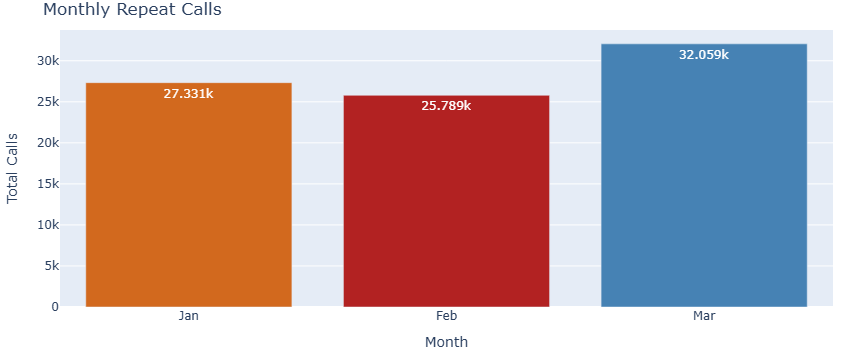

In [72]:
# Define the correct order of months
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Ensure that "Month" is treated as a categorical type with the correct order
repMonth['Month'] = pd.Categorical(repMonth['Month'], categories=month_order, ordered=True)

# Sort the data based on the "Month" column to ensure correct ordering
repMonth = repMonth.sort_values('Month')

# Define the color palette (shades of brown, red, and blue)
color_palette = ["#D2691E", "#B22222", "#4682B4", "#4682B4", "#5F9EA0", "#B22222", "#8B4513"]

# Plot the bar chart using plot_aggregated_data function (if you are using this custom function)
fig_repMonth = plot_aggregated_data(
    repMonth,
    x_axis="Month",
    y_axes=["Total_Contacts"],
    title="Monthly Repeat Calls",
    labels={"Month": "Month", "Total_Contact": "Total Contacts"},
    chart_type="bar"  # Bar chart
)

# Apply the color palette
fig_repMonth.update_traces(marker=dict(color=color_palette))

# Tighten layout by adjusting margins
fig_repMonth.update_layout(
    title="Monthly Repeat Calls",
    xaxis_title="Month",
    yaxis_title="Total Calls",
    margin=dict(l=20, r=20, t=30, b=40),  # Tight margins
    showlegend=False  # Optional: Hide the legend if not necessary
)

# Save the figure as an SVG
fig_repMonth.write_image("repMonth.svg", format="svg")

# Show the plot
fig_repMonth.show()


*Plot of Quarterly Repeat Calls*

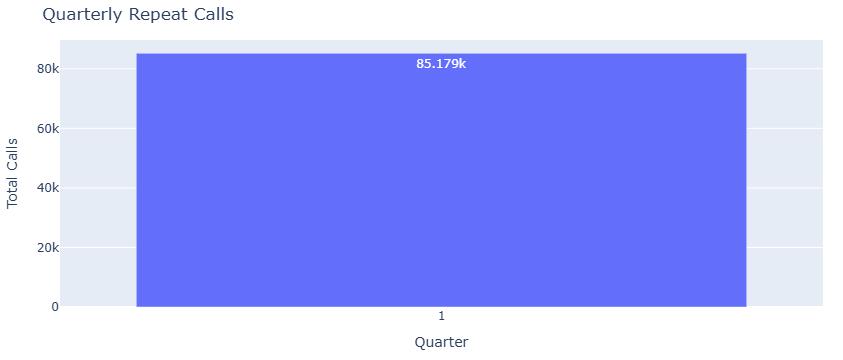

In [73]:
# Ensure that the 'Quarter' column is categorical (string type)
repQuarter['Quarter'] = repQuarter['Quarter'].astype(str)

# Plotting the Bar Chart for Total Contacts by Quarter
fig_repQuarter_bar = plot_aggregated_data(
    repQuarter,
    x_axis="Quarter",
    y_axes=["Total_Contacts"],
    title="Quarterly Repeat Calls",
    labels={"Quarter": "Quarter", "Total_Contact": "Total Contacts"},
    chart_type="bar" 
)

# Adjusting the layout for tightness
fig_repQuarter_bar.update_layout(
    title="Quarterly Repeat Calls",
    xaxis_title="Quarter",
    yaxis_title="Total Calls",
    margin=dict(l=20, r=20, t=40, b=20),  # Tighten the margins
    showlegend=False  # Optionally hide the legend if it's not necessary
)

# Save the figure as an SVG
fig_repQuarter_bar.write_image("repQuarter.svg")

# Show the figure
fig_repQuarter_bar.show()